# Data Mining Versuch Fahrzeugdaten

* Autor: Prof. Dr. Johannes Maucher
* Datum: 11.03.2021

**Abzugeben ist das Jupyter Notebook mit dem verlangten Implementierungen, den entsprechenden Ausgaben, Antworten und Diskussionen/Beschreibungen. Das Notebook ist als .ipynb und als .html abzugeben.**

* [Übersicht Jupyter Notebooks im Data Mining Praktikum](Data%20Mining%20Praktikum.ipynb)


# Einführung
## Lernziele:
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* Datenimport und Datenexport von und zu 
    * Pandas Dataframes
    * PostgreSQL Datenbanken
* Explorative Datenanalysen (EDA)
* Datenvisualisierung mit Matplotlib und plotly
* Überwachtes Lernen eines Klassifikationsmodells
* Überwachtes Lernen eines Regressionsmodells
* Evaluation von Klassifikationsmodellen
* Evaluation von Regressionsmodellen
* Kreuzvalidierung
* Hyperparameteroptimierung

## Vorbereitung

### Datenbankzugriff
1. Installieren Sie PostgreSQL. Mit PostgreSQL sollte auch pgAdmin installiert werden. PgAdmin ist eine open-source Software für die Entwicklung und die Administration von PostgreSQL Datenbanken.
2. Legen Sie über pgAdmin eine Datenbank für das Datamining-Praktikum an. In diese Datenbank werden alle in diesem Versuch relevanten Tabellen geschrieben.
3. Für den Datenbankzugriff aus Python heraus wird in diesem Versuch [SQLAlchemy](http://docs.sqlalchemy.org/en/latest/intro.html) eingesetzt. Machen Sie sich mit den Basics von SQLAlchemy vertraut, z.B. mithilfe von [https://gitlab.mi.hdm-stuttgart.de/maucher/DataScienceProgramming/blob/master/Python/Lecture/07DataBasePandas.ipynb](https://gitlab.mi.hdm-stuttgart.de/maucher/DataScienceProgramming/blob/master/Python/Lecture/07DataBasePandas.ipynb), Abschnitt *Using SQLAlchemy and Pandas*.

### Pandas Dataframe
Machen Sie sich mit den Grundlagen von Pandas vertraut.


### Machine Learning
Machen Sie sich mit Entscheidungsbäumen, Random Forest, Single Layer Perzeptron und Multi Layer Perzeptron vertraut. 

# Durchführung

## Einlesen der Daten aus .csv und Ablage in PostgreSQL
In diesem ersten Teil des Versuchs sollen die relevanten Daten aus dem .csv-File eingelesen und in einer PostgreSQL-Tabelle abgelegt werden. Das benötigte File `Fahrzeuginformationen.csv` liegt im aktuellen Verzeichnis.

1. Laden Sie die .csv-Datei in einen Pandas Dataframe. 

2. Zeigen Sie für den angelegten Dataframe 
    * die ersten 10 Zeilen
    * die Größe (Anzahl Zeilen und Anzahl Spalten)
    * die Anzahl der NaNs pro Spalte
    an. 
3. Zeigen Sie mit der Pandas-Dataframe Methode `info()`, den Datentyp aller Spalten an. Der Typ der Spalte `CO2-Emissionen` ist tatsächlich kein numerischer Typ. Finden Sie heraus warum das so ist. Beheben Sie den *Fehler* und sorgen Sie dafür, dass auch diese Spalte einen numerischen Typ hat.

4. Schreiben Sie den im vorigen Schritt angepassten Dataframe mit der Pandas Methode `to_sql()` in eine Datenbanktabelle mit dem Namen `vehicledata`.

In [1]:
#conda install -y psycopg2
#!conda install -y -c anaconda sqlalchemy

Als Erstes wird die pandas Bibliothek importiert, da diese im Laufe dieses Notebooks des Öfteren verwendet wird.

In [2]:
import pandas as pd

Im nächsten Schritt werden die relevanten Fahrzeuginformationen aus der CSV Datei geladen, damit sie in den folgenden Zeilen verarbeitet werden können. Dies kann einfach mit der pandas-eigenen Funktion *read_csv* erreicht werden. Diese liest eine vorhandene CSV-Datei in ein Pandas-Dataframe ein.

In [3]:
vehicle_data_source = "Fahrzeuginformationen.csv"
vehicle_data = pd.read_csv(vehicle_data_source)

Um sicher zu stellen, dass die Daten auch korrekt und vollständig sind, sollte man einen Blick darauf werfen.
Die folgenden Punkte sollen betrachtet werden:
* die ersten 10 Zeilen
* die Größe (Anzahl Zeilen und Anzahl Spalten)
* die Anzahl der NaNs pro Spalte



 Die ersten zehn Zeilen des Dataframes:

In [4]:
n = 10
print("First {} items of dataframe: \n{}".format(n, vehicle_data.head(n)))

First 10 items of dataframe: 
  HST Benennung            HT Benennung             UT Benennung  Karosserie  \
0    Volkswagen  T6 Bus (SG)(05.2015->)       Multivan Trendline  Bs           
1    Volkswagen  T6 Bus (SG)(05.2015->)     Multivan Comfortline  Bs           
2    Volkswagen  T6 Bus (SG)(05.2015->)  Multivan Generation Six  Bs           
3    Volkswagen  T6 Bus (SG)(05.2015->)  Multivan 70 Jahre Bulli  Bs           
4    Volkswagen  T6 Bus (SG)(05.2015->)            Multivan Join  Bs           
5    Volkswagen  T6 Bus (SG)(05.2015->)    Multivan PanAmericana  Bs           
6    Volkswagen  T6 Bus (SG)(05.2015->)         Multivan Edition  Bs           
7    Volkswagen  T6 Bus (SG)(05.2015->)       Multivan Join lang  Bs           
8    Volkswagen  T6 Bus (SG)(05.2015->)        Multivan Highline  Bs           
9    Volkswagen  T6 Bus (SG)(05.2015->)        Multivan Business  Bs           

   Neupreis Brutto  Produktgruppe Kraftstoffart Schadstoffklasse   CCM   KW  \
0         

In [5]:
rows = vehicle_data.shape[0]
columns = vehicle_data.shape[1]

print("Zeilen im Dataframe: {}".format(rows))
print("Spalten im Dataframe: {}".format(columns))

Zeilen im Dataframe: 24194
Spalten im Dataframe: 25


Um herauszufinden, ob es nicht-angegebene Werte in den jeweiligen Spalten gibt, wird sich einer dictionary-comprehension bedient, welche die jeweiligen Spalten mit der Anzahl ihrer nicht-angegebenen / fehlenden Werte in ein dictionary schreibt.
Mit Hilfe dieses dictionaries ist es ebenso möglich, die Gesamtzahl der nicht-angegebenen Werte anzuzeigen, indem die Summe über alle Werte erzeugt wird.
In vorliegendem Beispiel sind alle Datenwerte vorhanden.



In [6]:
nans_per_column = {column: vehicle_data[column].isnull().sum() for column in vehicle_data}
print("NaNs per column: \n{}".format(nans_per_column))
contains_nans = sum(nans_per_column.values()) != 0
print("Dataset contains incomplete data: {}".format(contains_nans))

#Zweite Lösung:
#dataframe.isnull().sum(axis = 0)

NaNs per column: 
{'HST Benennung': 0, 'HT Benennung': 0, 'UT Benennung': 0, 'Karosserie': 0, 'Neupreis Brutto': 0, 'Produktgruppe': 0, 'Kraftstoffart': 0, 'Schadstoffklasse': 0, 'CCM': 0, 'KW': 0, 'HST PS': 0, 'Getriebeart': 0, 'Getriebe Benennung': 0, 'Anzahl der Türen': 0, 'Leergewicht': 0, 'Zuladung': 0, 'Zulässiges GG': 0, 'Länge': 0, 'Breite': 0, 'Höhe': 0, 'CO2-Emissionen': 0, 'Min Energieeffizienzklasse': 0, 'Antrieb': 0, 'KSTA Motor': 0, 'HST-HT Benennung': 0}
Dataset contains incomplete data: False


Die Datentypen der Spalten bzw. gesamten Zeileneinträge werden sichtbar gemacht. Es fällt
auf, dass Die Spalte 'CO2-Emissionen' vom Datentyp object ist statt wie erwartet vom Datentyp int64
oder float64.

In [7]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24194 entries, 0 to 24193
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HST Benennung               24194 non-null  object 
 1   HT Benennung                24194 non-null  object 
 2   UT Benennung                24194 non-null  object 
 3   Karosserie                  24194 non-null  object 
 4   Neupreis Brutto             24194 non-null  int64  
 5   Produktgruppe               24194 non-null  object 
 6   Kraftstoffart               24194 non-null  object 
 7   Schadstoffklasse            24194 non-null  object 
 8   CCM                         24194 non-null  int64  
 9   KW                          24194 non-null  int64  
 10  HST PS                      24194 non-null  int64  
 11  Getriebeart                 24194 non-null  object 
 12  Getriebe Benennung          24194 non-null  object 
 13  Anzahl der Türen            241

**Vermutung:** Dass die Spalte CO2-Emissionen vom Typ *object* ist, führt zu der Vermutung, dass es darin einige Werte geben muss, die keine ''reinen Zahlen'' sind, sondern beispielsweise Buchstaben und andere Zeichen enthalten.

**Lösung 1:** Für die Lösung des Problems wird eine Series erstellt, in der der Datentyp aller Zeileneinträge der Spalte 'CO2-Emissionen', wenn möglich, in einen numerischen Datentyp gewandelt wird. Wenn sich ein Wert nicht umwandeln lässt, wird an seine Stelle stattdessen NaN geschrieben. Die Zeilen des Dataframes, in denen sich (in der Series) ein NaN befindet, werden ausgegeben.

In [8]:
bad_entry = pd.to_numeric(vehicle_data['CO2-Emissionen'], errors='coerce')

print(vehicle_data[bad_entry.isna()])

      HST Benennung            HT Benennung             UT Benennung  \
16886        Toyota              C-HR (X10)  Hybrid Business Edition   
16888        Toyota              C-HR (X10)            Hybrid Team D   
16893        Toyota              C-HR (X10)            Hybrid Lounge   
16895        Toyota              C-HR (X10)   Hybrid Style Selection   
16897        Toyota              C-HR (X10)    Hybrid Orange Edition   
18186          Seat  Ateca (KH7)(03.2016->)                    Style   

       Karosserie  Neupreis Brutto               Produktgruppe Kraftstoffart  \
16886  SUV                   32097  Kompakt-SUV / Geländewagen            08   
16888  SUV                   33769  Kompakt-SUV / Geländewagen            08   
16893  SUV                   37758  Kompakt-SUV / Geländewagen            08   
16895  SUV                   37180  Kompakt-SUV / Geländewagen            08   
16897  SUV                   40538  Kompakt-SUV / Geländewagen            08   
18186  SUV     

**Lösung 2:** Im Folgenden werden nacheinander alle in der Spalte CO2-Emissionen befindlichen Werte zu einem float gecastet. Falls dies nicht für alle Werte funktionieren sollte, werden diese jeweils als Error gefangen und angezeigt.

In [9]:
for item in vehicle_data["CO2-Emissionen"]:
    try:
        float(item)
    except ValueError:
        print("{} can't be cast to a numeric data type".format(item))

9,2 can't be cast to a numeric data type
9,2 can't be cast to a numeric data type
9,2 can't be cast to a numeric data type
9,2 can't be cast to a numeric data type
9,2 can't be cast to a numeric data type
8,5 can't be cast to a numeric data type


Die Ergebnisse zeigen, dass einige Werte der Spalte CO2-Emissionen mit einem *Komma* statt einem *Punkt* abgespeichert sind. Dies könnte daher kommen, dass das Datenset von deutschprachigen Autoren stammt und im Deutschen Dezimalzahlen mit einem Komma statt einem Punkt getrennt werden.

Es wird eine Kopie des Dataframes *vehicle_data* erstellt, in welcher die Kommas der betroffenen Werte mithilfe der replace()-Methode zu Punkten umgewandelt und hiernach der Datentyp aller Werte in der Spalte CO2-Emissionen in float gewandelt wird.

In [10]:
vehicle_data_updated = vehicle_data.copy()
vehicle_data_updated["CO2-Emissionen"] = vehicle_data_updated["CO2-Emissionen"].map(
    lambda row: row.replace(",", "."),
    na_action="ignore")
updated_data_types = {"CO2-Emissionen": float}
vehicle_data_updated = vehicle_data_updated.astype(updated_data_types)

Die Verbindung zur PostgreSql-Datenbank wird aufgebaut und das neue Dataframe wird in die Datenbanktabelle geschrieben.

In [11]:
import psycopg2
from sqlalchemy import create_engine

with open('../config/postgres.json') as f:
    config = json.load(f)

conn_str = f'postgresql://{config["user"]}:{config["password"]}@{config["host"]}:{config["port"]}/{config["database"]}'
engine = create_engine(conn_str)

table_name = "vehicle_data"

df_to_store = vehicle_data_updated

df_to_store.to_sql(name=table_name, index=True, if_exists="append", con=engine)

## Exemplarische Datenbankabfragen

1. Verwenden Sie Pandas Dataframe Methode `read_sql_query()` um 3 für Sie interessante Datenbankabfragen zu implementieren. Die Resultate der Abfragen werden in einen Pandas Dataframe geschrieben. Zeigen Sie diese an. 

Im Folgenden werden drei unterschiedliche Queries auf die Datenbank angewandt und ausgegeben. Um das Ausfuehren und Verarbeiten von Queries zu vereinfachen, wird sich einer Funktion bedient, die Queries auf die Datenbank anwendet und das Ergebnis auf eine gegebene Funktion anwendet. In diesem Fall ist diese Funktion nur eine simple Ausgabe in die Konsole. Es werden zunaechst die Queries definiert, die ausgefuehrt werden sollen.

In [12]:
limit = 3

q1 = f"SELECT * FROM vehicle_data LIMIT {limit};"
q2 = f'SELECT "HST Benennung", COUNT(*) FROM vehicle_data GROUP BY "HST Benennung" LIMIT {limit};'
q3 = f'SELECT "HST Benennung", "HT Benennung", "UT Benennung", "Neupreis Brutto" FROM vehicle_data ORDER BY "Neupreis Brutto" DESC LIMIT {limit};'

qs = [q1, q2, q3]
print(qs)

['SELECT * FROM vehicle_data LIMIT 3;', 'SELECT "HST Benennung", COUNT(*) FROM vehicle_data GROUP BY "HST Benennung" LIMIT 3;', 'SELECT "HST Benennung", "HT Benennung", "UT Benennung", "Neupreis Brutto" FROM vehicle_data ORDER BY "Neupreis Brutto" DESC LIMIT 3;']


Jetzt wird die Funktion fuer die Verarbeitung der Queries definiert. Hier wird sich einiger praktischer idiomatischer Python-Features, wie List-Comprehensions und Funktionales Programmieren, bedient.

In [13]:
def execute_and_process(queries, f):
    try:
        if type(queries) == list:
            results = [pd.read_sql_query(sql=query, con=engine) for query in queries]
            [f(result) for result in results]
        elif type(queries) == str:
            result = pd.read_sql_query(sql=queries, con=engine)
            f(result)
        else:
            raise ValueError("invalid query format")
    except: 
        print("invalid query/queries")

Jetzt wird diese Funktion auf die gegebenen Queries angewandt. 

In [14]:
execute_and_process(qs, print)

   index HST Benennung            HT Benennung             UT Benennung  \
0      0    Volkswagen  T6 Bus (SG)(05.2015->)       Multivan Trendline   
1      1    Volkswagen  T6 Bus (SG)(05.2015->)     Multivan Comfortline   
2      2    Volkswagen  T6 Bus (SG)(05.2015->)  Multivan Generation Six   

   Karosserie  Neupreis Brutto  Produktgruppe Kraftstoffart Schadstoffklasse  \
0  Bs                    37962  T5-Klasse Pkw            BS               E6   
1  Bs                    45294  T5-Klasse Pkw            BS               E6   
2  Bs                    48675  T5-Klasse Pkw            BS               E6   

    CCM  ...  Zuladung  Zulässiges GG Länge Breite  Höhe  CO2-Emissionen  \
0  1896  ...       905    2967.615635  4852   1849  2019           218.0   
1  1990  ...       753    3061.848723  4859   1827  1938           218.0   
2  1943  ...       768    3018.887414  4788   1823  1990           218.0   

   Min Energieeffizienzklasse     Antrieb    KSTA Motor  \
0             

## Data Exploration
1. Zeigen Sie für alle Spalten die Anzahl der unterschiedlichen Werte in dieser Spalte an.
2. Benutzen Sie die Pandas Dataframe Methode `describe()` um sämtliche deskriptiven Statistiken anzuzeigen.
3. Legen Sie eine Liste `numeric_features` an, welche nur die Spaltennamen der numerischen Spalten enthält.
4. Schreiben Sie die Namen aller nicht-numerischen Spalten in eine Liste `categoric_features`.
5. Visualisieren Sie für die Spalten `HST_Benennung`, `Neupreis Brutto`, `CO2-Emissionen` und `Produktgruppe` die Verteilung der Werte in einem Barplot bzw. Histogramm.

In [15]:
distinct_values_per_collumn = vehicle_data_updated.nunique()
print(distinct_values_per_collumn)

HST Benennung                    42
HT Benennung                    617
UT Benennung                   3782
Karosserie                       22
Neupreis Brutto               19739
Produktgruppe                    28
Kraftstoffart                    14
Schadstoffklasse                  4
CCM                            2197
KW                              428
HST PS                          560
Getriebeart                       2
Getriebe Benennung              103
Anzahl der Türen                  4
Leergewicht                    1833
Zuladung                       1208
Zulässiges GG                 23919
Länge                          2342
Breite                          651
Höhe                           1203
CO2-Emissionen                  279
Min Energieeffizienzklasse        8
Antrieb                           3
KSTA Motor                        6
HST-HT Benennung                617
dtype: int64


In [16]:
vehicle_data_updated.describe()

Neupreis Brutto           CCM            KW        HST PS  \
count     24194.000000  24194.000000  24194.000000  24194.000000   
mean      40301.051790   1851.156361    126.653798    172.273126   
std       22037.781929    616.193218     60.835718     82.667899   
min        6835.000000    831.000000     42.000000     51.000000   
25%       26910.000000   1482.000000     88.000000    120.000000   
50%       36720.000000   1941.000000    111.000000    151.000000   
75%       47632.250000   2011.000000    141.000000    192.000000   
max      287347.000000   6706.000000    511.000000    705.000000   

       Anzahl der Türen   Leergewicht      Zuladung  Zulässiges GG  \
count      24194.000000  24194.000000  24194.000000   24194.000000   
mean           4.480656   1588.890303    578.716211    2134.695183   
std            0.880526    367.170624    191.292064     524.077515   
min            2.000000     29.000000     58.000000       0.000000   
25%            4.000000   1381.000000    483.000000    1872.562390   
50%            5.000000   1555.000000    547.000000    2075.265444   
75%            5.000000   1745.000000    615.000000    2319.881506   
max            5.000000  10365.000000   7726.000000   15295.850636   

              Länge        Breite          Höhe  CO2-Emissionen  
count  24194.000000  24194.000000  24194.000000    24194.000000  
mean    4560.681905   1835.296478   1579.427503      135.869906  
std      412.813020     93.258553    219.588359       33.439398  
min     2571.000000   1394.000000   1180.000000        8.500000  
25%     4339.000000   1782.000000   1446.000000      115.000000  
50%     4575.000000   1829.000000   1502.000000      130.000000  
75%     4801.000000   1883.000000   1647.000000      153.000000  
max     6958.000000   2293.000000   3023.000000      397.000000

In [17]:
from pandas.api.types import is_numeric_dtype
numeric_features = list(filter(lambda column_name: is_numeric_dtype(vehicle_data_updated[column_name]),
                              vehicle_data_updated.columns))
print(numeric_features)
print(len(numeric_features))

['Neupreis Brutto', 'CCM', 'KW', 'HST PS', 'Anzahl der Türen', 'Leergewicht', 'Zuladung', 'Zulässiges GG', 'Länge', 'Breite', 'Höhe', 'CO2-Emissionen']
12


Zur Ausgabe der numerischen Features filtern wir alle Spalten nach numerischem Type und speichern die Spaltennamen in eine Variable, die wir daraufhin ausgeben. Es wurden 12 numerische Features ausgegeben. 

In [18]:
categoric_features = vehicle_data_updated.columns.difference(set(numeric_features))
print(categoric_features)
print(len(categoric_features))

Index(['Antrieb', 'Getriebe Benennung', 'Getriebeart', 'HST Benennung',
       'HST-HT Benennung', 'HT Benennung', 'KSTA Motor', 'Karosserie',
       'Kraftstoffart', 'Min Energieeffizienzklasse', 'Produktgruppe',
       'Schadstoffklasse', 'UT Benennung'],
      dtype='object')
13


Zur Ausgabe der Kategorischen Features geben wir die Features aus, die nicht im Set der numerischen Features enthalten sind. Es sind 13 Kategorische Features in dem Dataframe enthalten. Dementsprechend wird es nötig sein, diese zu konvertieren, damit man sie auswerten kann.

In [19]:
import matplotlib.pyplot as plt


def visualize_bar(data, column, title=None, x_label=None, y_label=None):
    data_to_plot = data.groupby(column)[column].count()
    plt.figure(figsize=(15, 10))
    plt.barh(data_to_plot.index, data_to_plot)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    
def visualize_hist(data, column, bins=None, title=None, x_label=None, y_label=None):
    if not bins:
        bins = len(data) // 100
    data_to_plot = data[column]
    plt.figure(figsize=(15, 10))
    plt.hist(data_to_plot, bins=bins)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

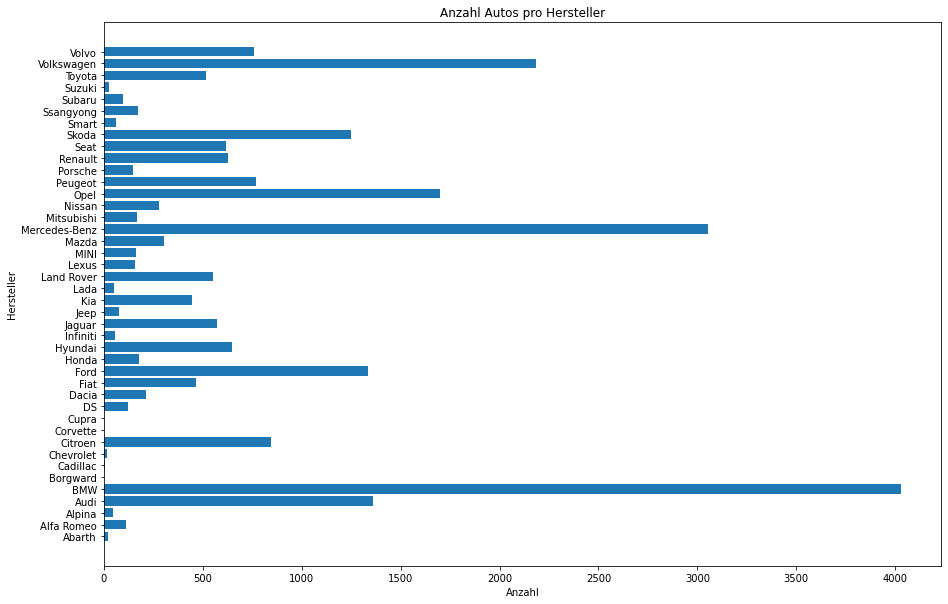

In [20]:
visualize_bar(vehicle_data_updated, "HST Benennung",
              title="Anzahl Autos pro Hersteller", x_label="Anzahl", y_label="Hersteller")

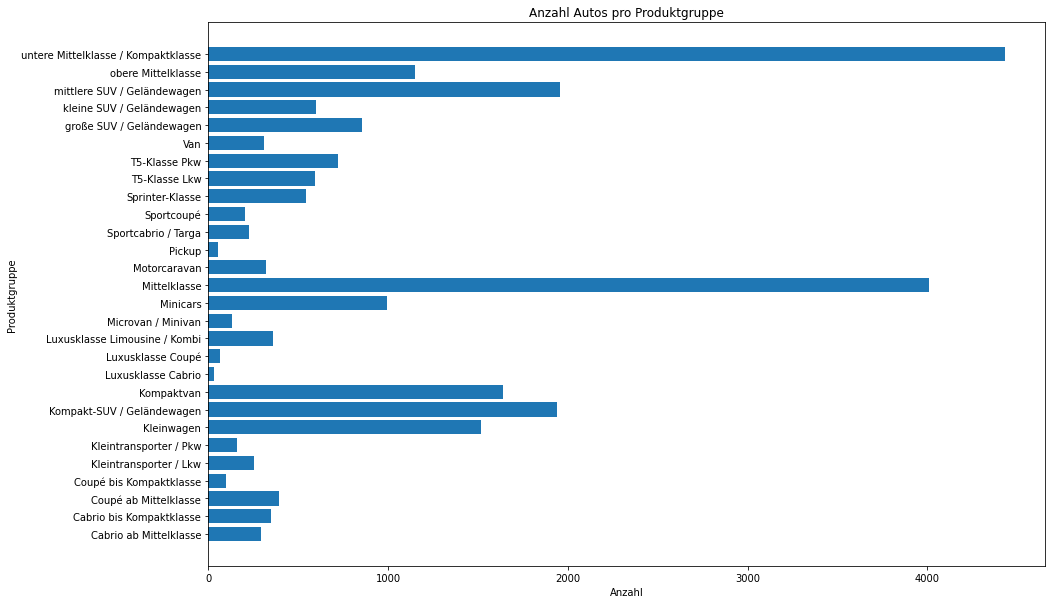

In [21]:
visualize_bar(vehicle_data_updated, "Produktgruppe",
              title="Anzahl Autos pro Produktgruppe", x_label="Anzahl", y_label="Produktgruppe")

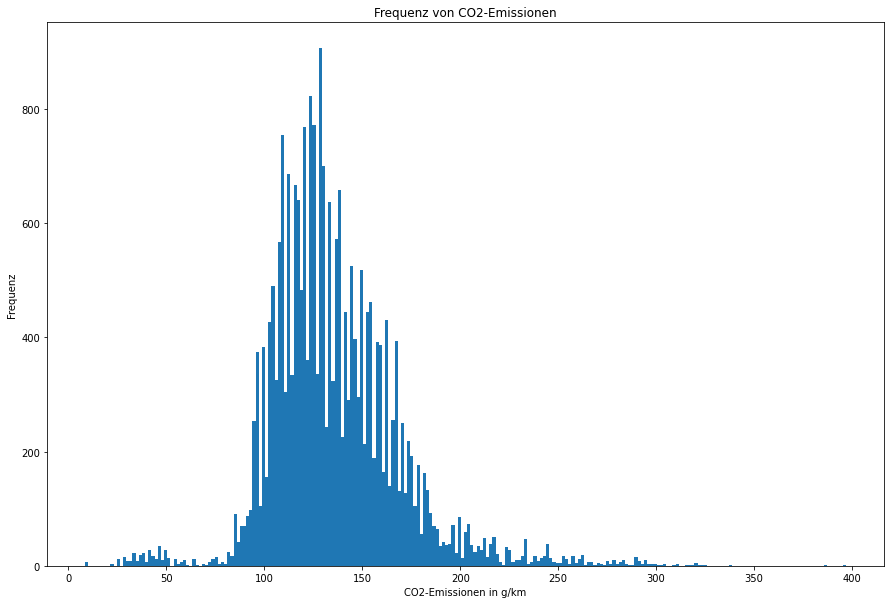

In [22]:
visualize_hist(vehicle_data_updated, "CO2-Emissionen",
               title="Frequenz von CO2-Emissionen", x_label="CO2-Emissionen in g/km", y_label="Frequenz")

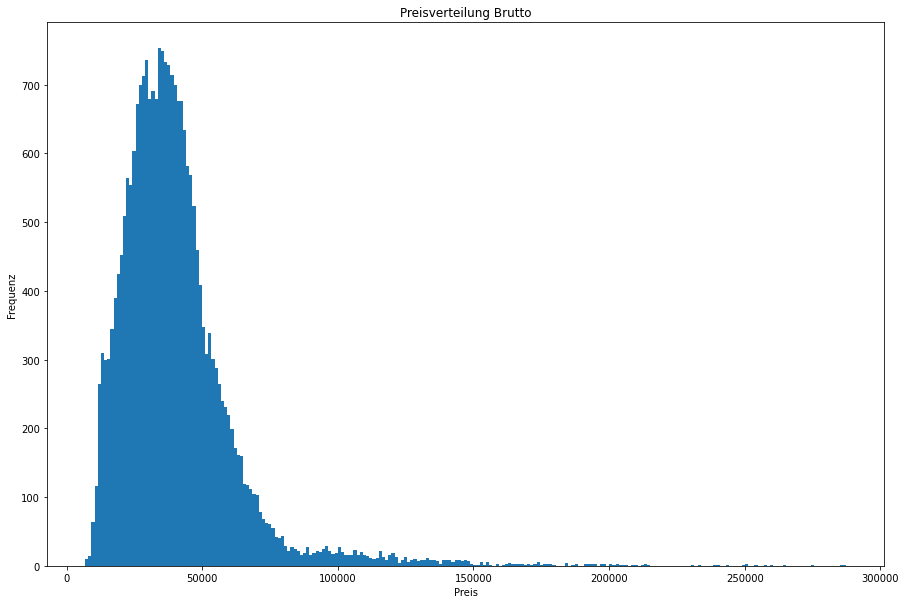

In [23]:
visualize_hist(vehicle_data_updated, "Neupreis Brutto",
              title="Preisverteilung Brutto", x_label="Preis", y_label="Frequenz")

## Machine Learning 1: Produktgruppenbestimmung

In diesem Abschnitt soll ein Klassifikator trainiert werden, welcher anhand von Eingabemerkmalen, wie *Breite*, *Höhe*, *Gewicht* usw. das zugehörige Fahrzeugsegment (`Produktgruppe`) vorhersagt.

In diesem Teilversuch sollen als Eingabemerkmale die zuvor in `numeric_features` definierten Spalten und die nicht-numerischen Spalten `Antrieb`, `Kraftstoffart`, `KSTA Motor` verwendet werden. Die Zielvariable (Ausgabe) stellt die Spalte `Produktgruppe` dar.


### Produktgrunppenspezifische Visualisierung

1. Plotten Sie für die drei oben angegebenen nicht-numerischen Merkmale jeweils eine Produktgruppen-spezifische Häufigkeitsverteilung in der unten dargestellten Form. 

<img src="https://maucher.home.hdm-stuttgart.de/Pics/antrieb_produktgruppe.png" style="width:500px" align="center">

2. Plotten Sie für alle numerischen Merkmale jeweils einen Produktgruppen-spezifischen Boxplot in der unten dargestellten Form. 

<img src="https://maucher.home.hdm-stuttgart.de/Pics/neupreis_produktgruppe.png" style="width:500px" align="center">

3. Erzeugen Sie mit [plotly.express scatter()](https://plotly.com/python/line-and-scatter/) einen 2-dimensionalen Plot, in dem alle Fahrzeuge wie folgt dargestellt werden (pro Fahrzeug ein Marker):
- x-Achse: `Länge`
- y-Achse: `Höhe`
- Farbe des Markers: `Produktgruppe`
- Größe des Markers: `Leergewicht`
- Bei *Mouse-Over* soll für den jeweiligen Marker der entsprechende Wert von `Neupreis Brutto` und `HST-HT Benennung` angezeigt werden. 

Zunächst werden die möglichen Werte angezeigt, die ein Zeileneintrag für die Spalte "Kraftstoffart" annehmen kann:

In [24]:
print(vehicle_data_updated["Kraftstoffart"].unique())

['BS' 'D ' '08' 'SP' '07' 'B1' 'E ' '06' '25' '10' 'S ' 'BN' '09' '26']


Diese Werte ergeben einzelne, übereinandergestapelte Balken mit der Anzahl der jeweiligen Kraftstoffarten als Höhe des Balkens für jede Produktgruppe. Definieren wird hierbei eine Funktion, die uns die relevanten Daten extrahiert und diese in einem horizontal Balken-Diagramm anzeigt.

In [25]:
def plot_barh_by_values(data, column, index_column, title=None, x_label=None, y_label=None):
    index_values = data[index_column].unique()
    index_values.sort(axis=0)
    grouped_counts = {index_value: data.loc[data[index_column] == index_value][column].
                      value_counts() for index_value in index_values}
    df = pd.DataFrame(grouped_counts).T
    df.plot(kind="barh", stacked=True, figsize=(15, 10), title=title, xlabel=x_label, ylabel=y_label)
    plt.show()

Im Folgenden wird ein Diagramm geplotted, welches die Kraftstoffart pro Produktgruppe darstellt.

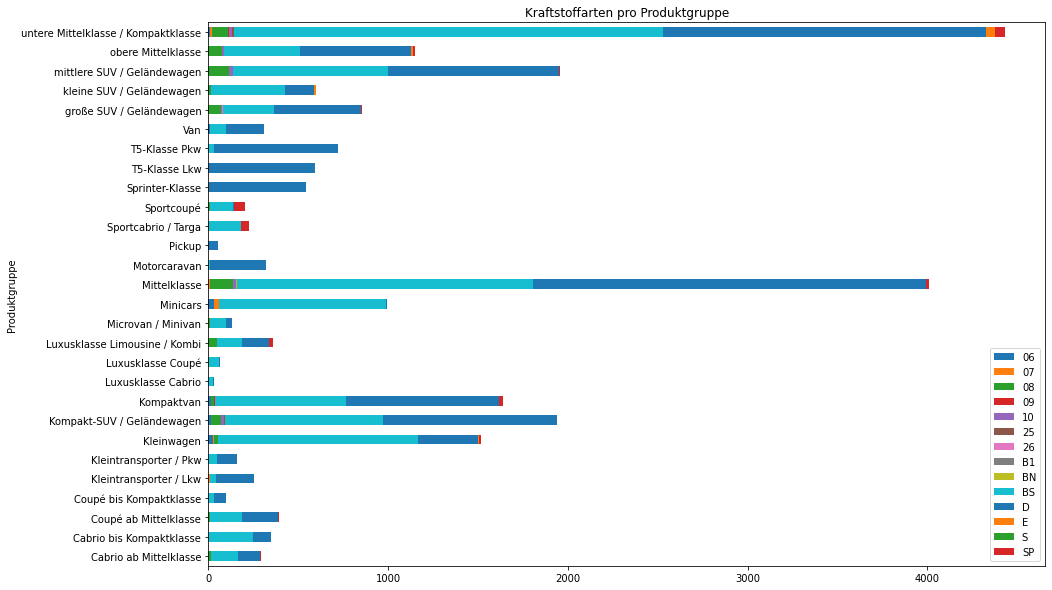

In [26]:
plot_barh_by_values(vehicle_data_updated, "Kraftstoffart", "Produktgruppe",
                   title="Kraftstoffarten pro Produktgruppe", x_label="Produktgruppe", y_label="Anzahl")

Man kann hier gut erkennen, dass Diesel und Benzin die Hauptkraftstoffarten sind. Des Weiteren fällt auf, dass es viele verschiedene Kraftstoffarten gibt, bei denen die meisten allerdings nur in sehr geringen Mengen vorhanden sind.

Im nächsten Diagramm wird der Antrieb der jeweiligen Produktgruppen dargestellt:

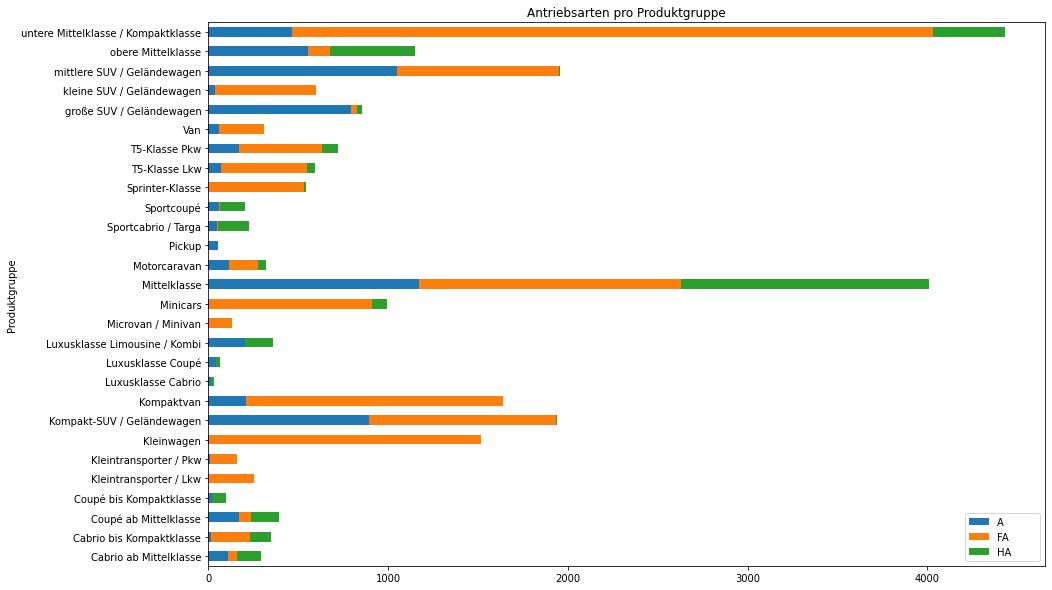

In [27]:
plot_barh_by_values(vehicle_data_updated, "Antrieb", "Produktgruppe",
                   title="Antriebsarten pro Produktgruppe", x_label="Produktgruppe", y_label="Anzahl")

Auffaellig hier sind vor allem die kleineren Autos, welche fast ausschließlich Front-Antrieb haben.
Allrad-Antrieb findet man vor allem in der Oberklasse und bei den Geländewägen.

Abschließend wird der Motortyp abhängig von der Produktgruppe geplotted:

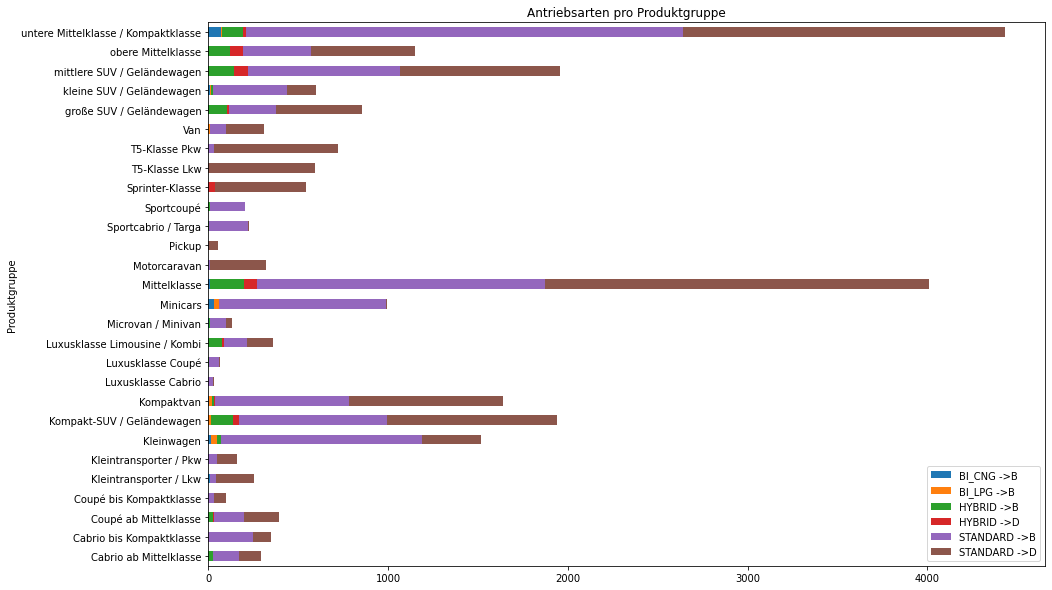

In [28]:
plot_barh_by_values(vehicle_data_updated, "KSTA Motor", "Produktgruppe",
                   title="Antriebsarten pro Produktgruppe", x_label="Produktgruppe", y_label="Anzahl")

Im Folgenden wird die 2. Darstellungform für numerische Datentypen benötigt.

In [29]:
def plot_boxplot_for_numerical(data, column, index_column):
    index_values = data[index_column].unique()
    index_values.sort(axis=0)
    grouped_counts = [data.loc[data[index_column] == index_value][column] for index_value in index_values]
    df = pd.DataFrame(zip(*grouped_counts), columns=index_values)
    
    style = {
        "patch_artist": True,
        "boxprops": {"color": "k"},
        "widths": 0.7
    }
    
    plt.figure(figsize=(15, 15))
    plt.title(column)
    plt.boxplot(df, vert=False, labels=index_values, **style) 
    plt.show()

Die Funktion kann genutzt werden, um beliebig viele der numerischen Merkmale zu plotten. Um das Anzeigen einfacher zu machen, kann die Variable "plots" anpasst werden, sodass nur die ersten x numerischen Merkmale geplotted werden. Um alle zu sehen, wird "plots" auf -1 gesetzt.

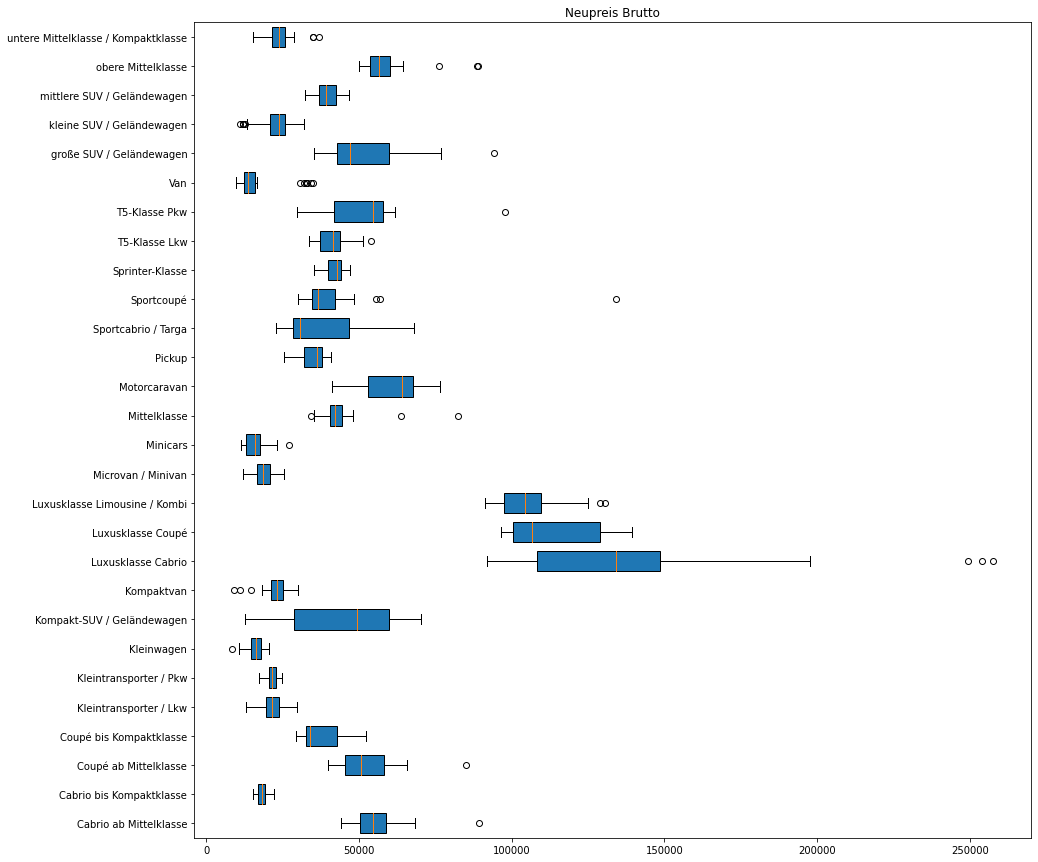

[None]

In [30]:
#change values to only see first x graphs
plots = 1
[plot_boxplot_for_numerical(vehicle_data_updated, numeric_feature, "Produktgruppe") for numeric_feature
 in numeric_features[:plots if plots >= 0 else len(numeric_features)]]

Jetzt wird versucht, ein interaktiven Plot mihilfe von Plotly zu erstellen. Dabei sollen die folgenden Bedingungen gelten:
- x-Achse: `Länge`
- y-Achse: `Höhe`
- Farbe des Markers: `Produktgruppe`
- Größe des Markers: `Leergewicht`
- Bei *Mouse-Over* soll für den jeweiligen Marker der entsprechende Wert von `Neupreis Brutto` und `HST-HT Benennung` angezeigt werden. 

In [31]:
import plotly.express as px
fig = px.scatter(vehicle_data_updated, x="Breite", y="Höhe",
                color="Produktgruppe", size="Leergewicht",
                hover_data=["Neupreis Brutto", "HST-HT Benennung"])
fig.show()

Auch wenn der Plot nicht sonderlich übersichtlich ist, kann man gut erkennen, dass sich die verschiedenen Farben, also die Produktgruppen, in kleinen Clustern zusammenfinden. Das bedeuted, dass die Produktgruppen jeweils ähnliche Breiten und Längen haben.

### Data Encoding

1. Categoriale Merkmale ohne Ordnungsrelation (=nominale Merkmale) müssen One-Hot-Encodiert werden. Führen Sie für die drei categorialen Merkmale ein One-Hot-Encoding mit dem [scikit-learn LabelBinarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html) durch.
2. Fügen Sie die one-hot-encodierten Spalten mit den numerischen Spalten zusammen. Weisen Sie die entsprechende Eingabedatenmatrix einem 2-dimensionalen numpy-array `X` zu. 
3. Führen Sie auf die Zielvariable `Produktgruppe` ein Label-Encoding mit [scikit-learn LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder) aus. Weisen Sie diese Daten dem 1-dimensionalen numpy-array `y` zu.

Im ersten Schritt werden die Numerischen und kategorische Features in eigene Dataframes extrahiert

In [261]:
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

numeric_features_df = vehicle_data_updated[numeric_features]
new_dataframe = numeric_features_df
categorical_columns = vehicle_data_updated[["Kraftstoffart", "Antrieb", "KSTA Motor"]]

Daraufhin werden die Werte in den Kategorischen Spalten kodiert und mit jedem durchlauf der For-Schleife jeweils mit dem Dataframe verknüpft.

In [262]:
for col in categorical_columns:
    lb = LabelBinarizer()
    category = lb.fit_transform(categorical_columns[col])
    df_make_encoded = pd.DataFrame(category, columns=lb.classes_)
    new_dataframe = pd.concat([new_dataframe, df_make_encoded], axis=1)

Der y-Array wird nun mit Labelencoding kodiert. Daraufhin wird X in ein Numpy Array umgewandelt.

In [268]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(vehicle_data_updated["Produktgruppe"])
X = new_dataframe.to_numpy(dtype='float', na_value=np.nan)
print (y[:5])

[21 21 21 21 21]


### Generate Training- and Testpartition
Benutzen Sie die [scikit-learn Methode train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) um `X` und `y` in einer Trainings- und Testpartition aufzuteilen. 30% der Daten soll für das Testen, 70% für das Training benutzt werden.

Bei den numpy-Arrays der Eingabemerkmale wird mit "X" ein Großbuchstabe verwendet, was sich aus der mathematischen Konvention ableitet. X ist der Eingabewert in der Funktion f(x)=y und stellt einen mehrdimensionalen Array dar, während y einen eindimensionalen Array bzw. Vector darstellt. 

In [33]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

### Decision Tree Training, Test and Evaluation
1. Trainieren Sie einen [Entscheidungsbaum](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) mit den Trainingsdaten.
2. Wenden Sie den gelernten Entscheidungsbaum auf die Testdaten.
3. Evaluieren Sie die Qualität des Entscheidungsbaumes indem Sie 
     - einen [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) erzeugen. 
     - die [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) plotten.
 
 Interpretieren Sie das Ergebnis.
 
4. Führen Sie eine [10-fache Kreuzvalidierung](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) des Entscheidungsbaumes mit den Daten `X` und `y` aus. Interpretieren Sie das Ergebnis.
5. Bestimmen Sie die *Wichtigkeit* der Eingabemerkmale für die Klassifikationsaufgabe, indem Sie auf den in 1.) gelernten DecisionTree das Attribut `feature_importance_` abfragen. Stellen Sie die Werte in einem Barplot dar.

In [34]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.829


Die Genauigkeit auf dem Trainingsset beträgt 100%. Das bedeutet, dass der Tree für jeden Eintrag im Trainingsset das richtige Ergebnis erzeugt. Deshalb werden Abzweigungen auch für einzelne, vom Median stark abweichende Werte erzeugt. Das führt zu Overfitting. Höchstwahrscheinlich lässt sich die Genauigkeit auf dem Testset verbessern, indem wir mit Prepruning das Overfitting begrenzen. 

Die erste Überlegung war, solange nach einer anderen maximalen Tiefe zu suchen, bis das Ergebnis nicht besser ist als das der vorherhigen Tiefe. Da dieses Vorgehen bedeuted hätte, erst einmal nur nach einem *lokalen* Maximum der Accuracy zu suchen, wurde die Idee jedoch verworfen.

Stattdessen wird eine maximal Tiefe definiert, innerhalb welcher nach dem Maximum der Accuracy geschaut wird.
Dazu kann man eine Funktion verwenden, welche einen Classifier als input bekommt. Mit einer For-Schleife werden Decision Trees mit zunehmender Tiefe erstellt. Der Tree mit der höchsten Genauigkeit wird ausgegeben. Max_Depth beschreibt, bis welcher Tiefe getestet wird. Natürlich könnte ein globales Maximum auch mit einer größeren Tiefe existieren, jedoch ist es in diesem Fall äußerst unwahrscheinlich, da das lokale Maximum der Tiefe bereits bei 12 erreicht wird und wir davon ausgehen, dass overfitting mit steigender Tiefe eher zunimmt. Daher entschieden wir uns aus Effizienzgründen dafür die Maximale Tiefe auf 12 zu beschränken. 

In [35]:
def find_best_classifier(classifier_class, max_depth=30):

    decision_trees = [classifier_class(random_state=0, max_depth=i) for i in range(1, max_depth)]
    [tree.fit(X_train, y_train) for tree in decision_trees]
    evaluations = [tree.score(X_test, y_test) for tree in decision_trees]
    best_accuracy = max(evaluations)
    best_depth = evaluations.index(best_accuracy)
    print("Best accuracy {} for classifier with depth: {:.3f}".format(best_accuracy, best_depth))
    best_tree = decision_trees[best_depth]
    return best_tree

Nun wird die Methode find_best_classifier aufgerufen und der DecisionTreeClassifier als input übergeben. 

In [36]:
best_tree = find_best_classifier(DecisionTreeClassifier)

Best accuracy 0.8352390136382422 for classifier with depth: 12.000


Die optimale Tiefe beträgt 12. Die Genauigkeit ist nur leicht besser als ohne Beschränkung, es kommt also immernoch zu overfitting.  

Mit default max_values = none ist max_values = n_values. Dementsprechend wird vermutlich keine oder eine nur geringe Randomisierung durch die Änderung des random_state auftreten. 

Im nächsten Schritt erzeugen wir einen Classification Report. Dazu erstellen wir eine Funktion, welche als Input Parameter die Testpartitionen und den besten Decision Tree bekommt. In der Funktion werden einmal die Vorraussagen des Models in y_predicted gespeichtert. Daraufhin wird mit den Vorraussagen und den tatsächlichen Werten ein Classification Report erzeugt.

In [37]:
from sklearn.metrics import classification_report

def print_classification_report(clf, X_test, y_test):

    y_predicted = clf.predict(X_test)
    y_actual = y_test
    labels=vehicle_data_updated["Produktgruppe"].unique()
    labels.sort(axis=0)
    report = classification_report(y_actual, y_predicted, target_names=labels)
    print(report)
    
print_classification_report(best_tree, X_test, y_test)

                                     precision    recall  f1-score   support

             Cabrio ab Mittelklasse       0.80      0.83      0.81        82
           Cabrio bis Kompaktklasse       0.95      0.91      0.93       106
              Coupé ab Mittelklasse       0.87      0.87      0.87       138
            Coupé bis Kompaktklasse       0.93      0.88      0.90        32
             Kleintransporter / Lkw       0.92      0.92      0.92        66
             Kleintransporter / Pkw       0.57      0.44      0.49        48
                         Kleinwagen       0.91      0.91      0.91       433
         Kompakt-SUV / Geländewagen       0.68      0.69      0.69       587
                         Kompaktvan       0.65      0.72      0.68       505
                 Luxusklasse Cabrio       0.57      0.89      0.70         9
                  Luxusklasse Coupé       0.73      0.44      0.55        25
      Luxusklasse Limousine / Kombi       0.85      0.88      0.86       10

### Beobachtungen



Die Präzesions und Recall Werte haben zwischen den unterschliedlichen Klassifizierungen relativ hohe DIfferenzen. Recall und Präzesionswerte in der selben Klasse liegen meistens nah beinander. Bei den beiden Differenzierungen mit dem größten Suppert, bzw. der größten Anzahl der Einträge in der Partition sind die Werte Überdurchschnittlich. Die Klassen Kompakt-SUV und Kompaktvan haben bei relativ vielen Einträgen niedrige Werte und wirken sich deshalb schlecht auf den Durchschnitt aus.

Bei Werten mit niedrigem Support ist es wahrscheinlicher, dass der Wert bei weiteren Testdaten von dem hier berechneten Wert abweicht. 

Im Folgenden wird angenommen, dass Klassifizierungen, die sich in den am stärksten gewicheten Kategorien wenig von den anderen Klassifizierungen unterscheiden, oft miteinander verwechselt werden und daher niedrigere Präzesions und Callback Werte haben. 


Im nächsten Schritt wird die Confusion Matrix ausgegeben.

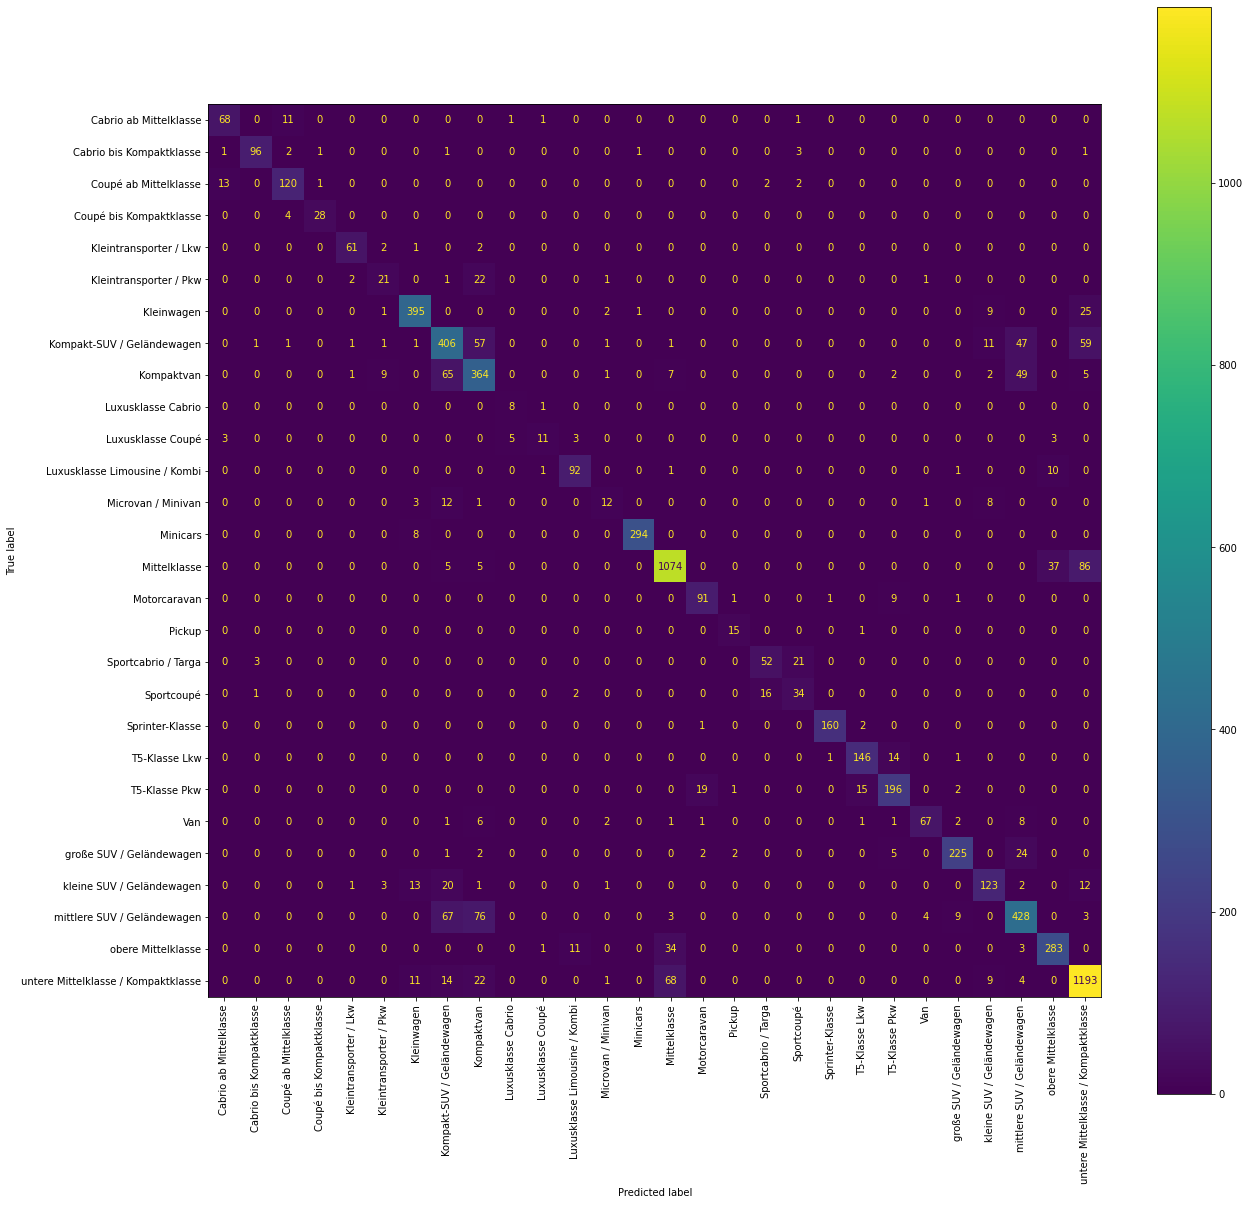

In [38]:
from sklearn.metrics import plot_confusion_matrix

def show_confusion_matrix(clf, X_test, y_test):
    labels=vehicle_data_updated["Produktgruppe"].unique()
    labels.sort(axis=0)
    fig, ax = plt.subplots(figsize=(20, 20))
    plot_confusion_matrix(clf, X_test, y_test, ax=ax, display_labels=labels)
    plt.xticks(rotation='vertical')
    plt.show()
    
show_confusion_matrix(best_tree, X_test, y_test)

Wie man sieht, befinden sich in der Diagonalen durchschnittlich hohe Werte.  Bei einigen Klassifikationen befinden sich jedoch auch relativ hohe Werte bei anderen Labeln, was bedeutet, dass unser Modell in bestimmten Fällen falsche Vorrausagen macht. 
Bei wenigen Klassifikationen wird öfters falsch Vorrausgesagt als richtig. Das bedeutet, dass das Modell gerade in diesen Fällen nicht verlässlich ist. Es besteht die Vermutung, dass dies mit der inherenten Tendenz des Decision Trees zusammenhängt, auch bei begrenzter Tiefe noch zu Overfitting zu neigen. Häufig wurden Kompaktvans mit Geländewagen verwechselt.

### Cross Validation:

In [39]:
from sklearn.model_selection import cross_val_score, ShuffleSplit

def print_cross_val_score(clf, X, y):
    shuffle_split = ShuffleSplit(test_size=.3, train_size=.7, n_splits=10)
    scores = cross_val_score(clf, X, y, cv=shuffle_split )
    print (scores)
    
print_cross_val_score(best_tree, X, y)

[0.83537677 0.83634109 0.83510125 0.82876429 0.82876429 0.82972861
 0.82903981 0.83716765 0.83510125 0.83124397]


Die Ergebnisse sind konsistent und einigermaßen gut, aber die Decision Trees haben tendenziell Probleme mit der Generalisierung (wegen Overfitting).
Die Varianz ist relativ gering, jedoch besteht die Annahme, dass mit einem Modell mit besserer Generalisierung eine höhere Genauigkeit möglich ist. 


Im nächsten Schritt wird die Gewichtung der Features in einem Diagramm ausgegeben:

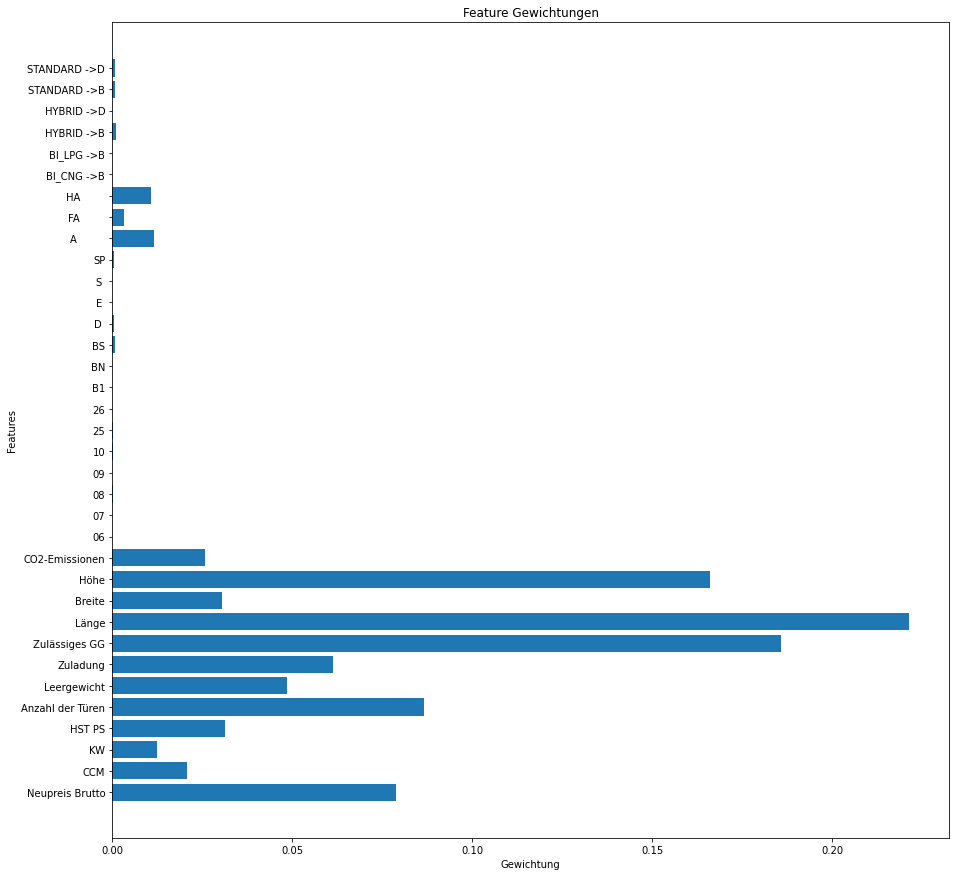

In [40]:
def plot_feature_importance(clf):
    n_features = len(new_dataframe.columns)
    plt.figure(figsize=(15, 15))
    plt.title('Feature Gewichtungen')
    plt.ylabel('Features')
    plt.xlabel('Gewichtung')
    plt.barh(new_dataframe.columns, clf.feature_importances_, align='center')
    
plot_feature_importance(best_tree)

Es ist zu beobachten, dass von den Kategorischen Features lediglich der Antrieb ('HA', 'FA', 'A') signifikant gewichtet ist. 
Interessant ist, dass die Fahzeugmaße "Länge", "Gesamtgewicht", "Höhe" und "Türen" am stärksten gewichtet wurden. Dies könnte zu Verwechslungen bei Fahrzeugtypen geführt haben, die sich in diesen Werten ähneln. 

### Random Forest Training, Test and Evaluation
Wiederholen Sie die Teilaufgaben 1. bis 5. des Entscheidungsbaums für einen [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Vergelichen Sie die Performance der beiden Verfahren.

Um den Random Forest zu erstellen wird erneut die "find_best_classifier" Methode genutzt, um pre_pruning über die Länge durchzuführen.  Aufgrund der Tatsache, dass Random Forests deutlich generalisierbarer sind als Decision Trees, besteht die Annahme, dass die gewählte Tiefe und die Genauigkeit deutlich höhert sein werden als bei dem normalen Decision Tree.

In [41]:
from sklearn.ensemble import RandomForestClassifier

best_forest = find_best_classifier(RandomForestClassifier)

Best accuracy 0.9246452679432429 for classifier with depth: 26.000


Die verwendete Länge ist 26. Der Random Forest ist deutlich genauer als der vorher verwendete Decision Tree. Damit haben sich unsere Annahmen bestätigt. 

### Classification Report. 

In [42]:
print_classification_report(best_forest, X_test, y_test)

                                     precision    recall  f1-score   support

             Cabrio ab Mittelklasse       0.88      0.94      0.91        82
           Cabrio bis Kompaktklasse       0.96      0.99      0.98       106
              Coupé ab Mittelklasse       0.94      0.93      0.93       138
            Coupé bis Kompaktklasse       1.00      0.91      0.95        32
             Kleintransporter / Lkw       0.98      0.91      0.94        66
             Kleintransporter / Pkw       0.83      0.62      0.71        48
                         Kleinwagen       0.93      0.96      0.95       433
         Kompakt-SUV / Geländewagen       0.90      0.80      0.85       587
                         Kompaktvan       0.86      0.88      0.87       505
                 Luxusklasse Cabrio       0.57      0.44      0.50         9
                  Luxusklasse Coupé       0.75      0.60      0.67        25
      Luxusklasse Limousine / Kombi       0.92      0.93      0.93       10

Insgesamt fällt auf, dass bei Klassifikationen mit Hoher Anzahl insgesamt hohe Genauigkeit auftritt. Bei Klassifikationen mit niedrigerer Anzahl ist dies nicht unbedingt der Fall, die Werte Schwanken je nach Produktgruppe. Gerade bei der Klasse "Minivan" ist das Modell ungenau, bei Pickup ist die Genauigkeit sehr hoch (wir gehen davon aus, dass dies daran liegt, dass Pick Ups relativ auffällige Fahrzeugmaße wie Höhe, Länge und Gewicht haben). Insgesamt funktioniert das Modell sehr gut, auffällig ist jedoch, dass oft die Genauigkeit mit der auffälligkeit von den Fahrzeugmaßen zusammenhängt (siehe Gewichtungen).


### Confusion Matrix:

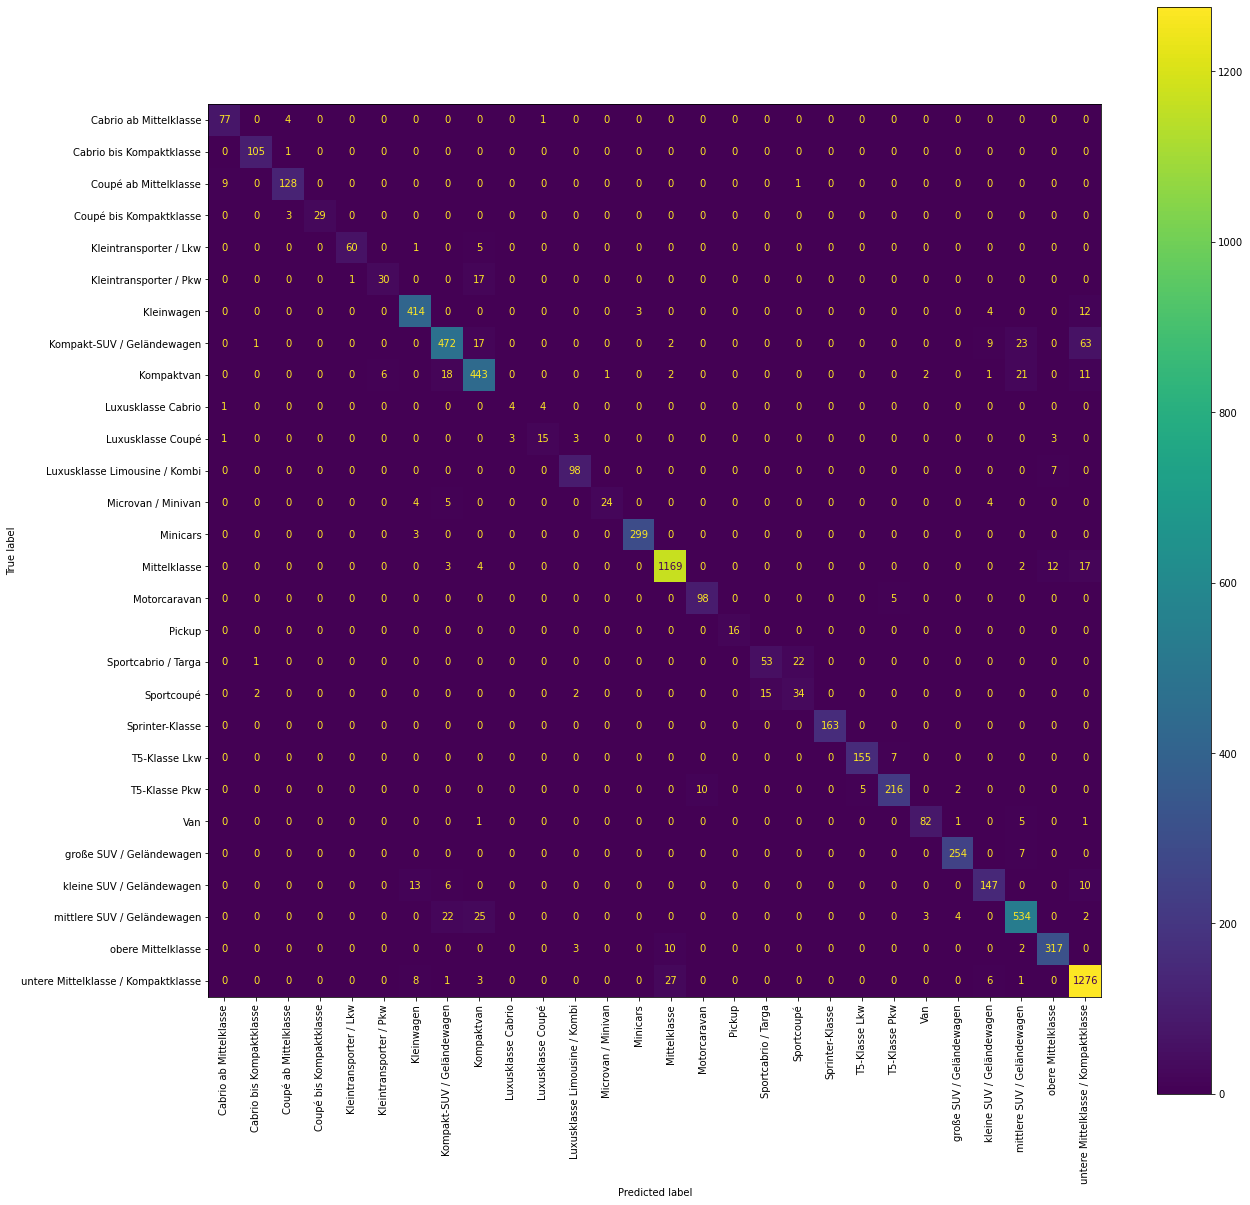

In [43]:
show_confusion_matrix(best_forest, X_test, y_test)

Insgesamt fällt auf, dass die Confusion Matrix genauer ausfällt als im vorherigen Beispiel. Einzelne Fälle sind nach wie vor nicht optimal. Einige Fälle bei denen es davor zu Ungenauigkeit kam wurden aber behoben. Hauptsächlich treten Probleme wegen Verwechslungen bei Coupes auf. Zwischen diesen Fahrzeugtypen gibt es große Gemeinsamkeiten, vor allem was Fahrzeugmaße und Gewicht betrifft. 

In [44]:
print_cross_val_score(best_forest, X, y)

[0.92726271 0.92078799 0.92299215 0.92244111 0.92340543 0.92795151
 0.92423199 0.92065023 0.92478303 0.92161455]


DIe Werte sind insgesamt besser und sehr konsistent. Die Annahme, dass Random Forests in dieser Aufgabe zu einer besseren Generalisierung führen, hat sich bestätigt.

Classification Report:

Es besteht die Annahme, dass die einzelnen Features sehr ähnlich gewichtet werden, wie bei dem Decision Tree.

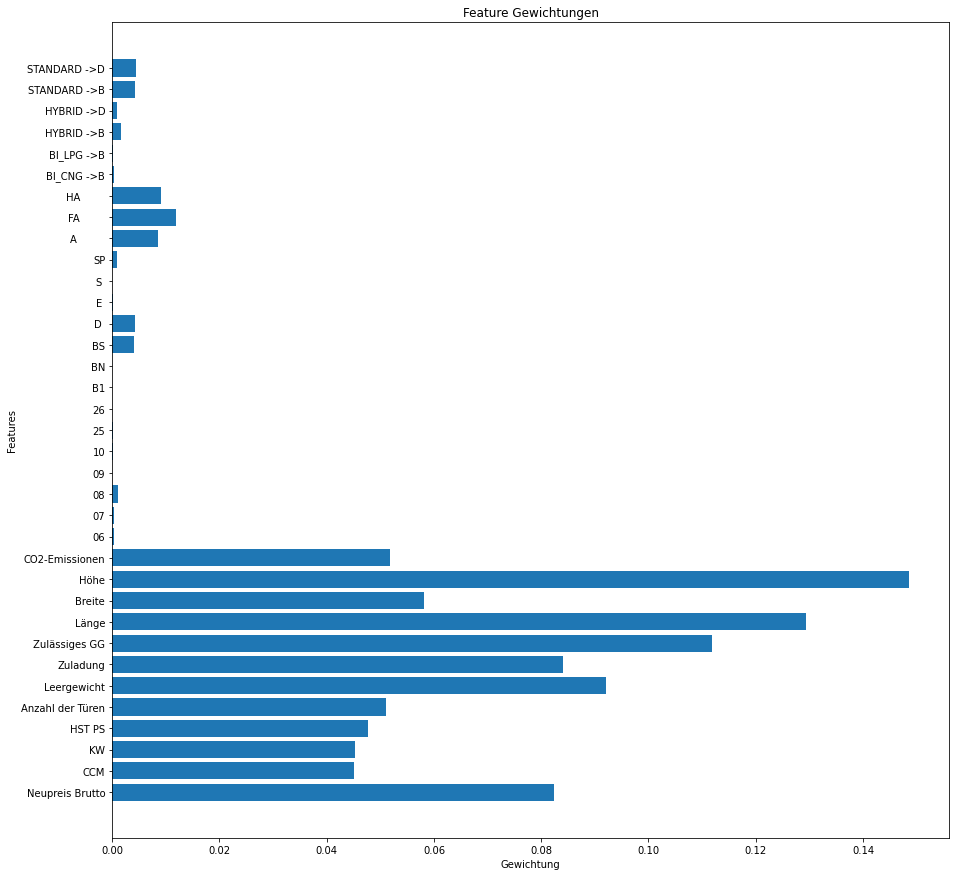

In [45]:
plot_feature_importance(best_forest)

Grundsätzlich ist die Gewichtung ähnlich, auffällig ist aber, dass die Gewichtungen gleichmäßiger auf die Features verteilt werden. Auch kategorische Features werden mehr mit einbezogen. Dies könnte damit zusammenhängen, dass das Model das Overfitting reduziert. 

## Machine Learning 2: Schätzung der CO2-Emission
In diesem Teilversuch soll aus den Eingabemerkmalen 

`"CCM","HST PS", "Anzahl der Türen", "Leergewicht", "Zuladung", "Länge", "Breite", "Höhe"`

die Zielvariable 

`CO2-Emissionen`

geschätzt werden. Hierzu soll ein möglichst gutes Regressionsmodell trainiert werden.

### Visuelle Korrelationsanalyse
1. Stellen Sie für jedes der 8 Eingabemerkmale die Korrelation mit der Zielvariablen visuell in einem Scatterplot dar, in dem das jeweilige Eingabemerkmal auf der x-Achse und die Zielvariable auf der y-Achse aufgetragen wird.
2. Diskutieren Sie die Korrelationen. Welche Merkmale korrelieren am stärksten mit der Zielvariable? Erscheint Ihnen das plausibel?

Die Scatterblocks werden erstellt und angezeigt. Die Y-Achse ist jeweils die Zielvariable CO2-Emissionen.

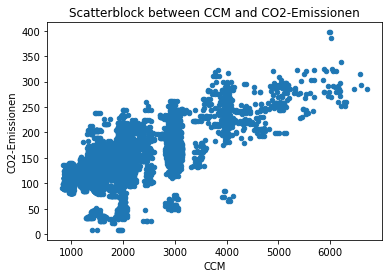

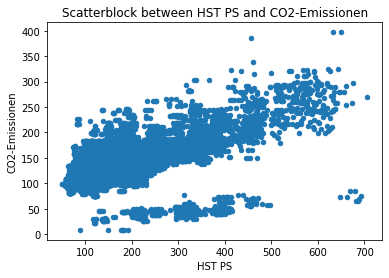

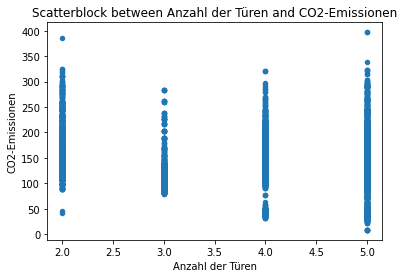

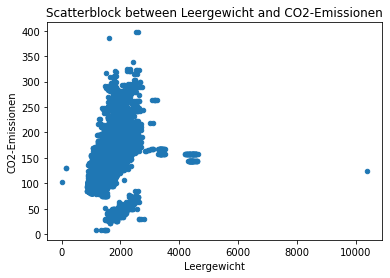

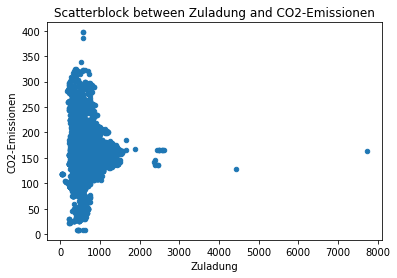

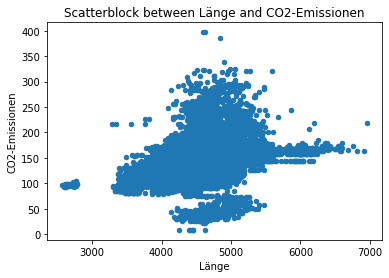

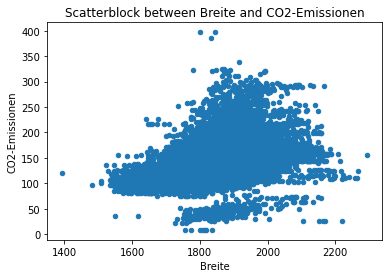

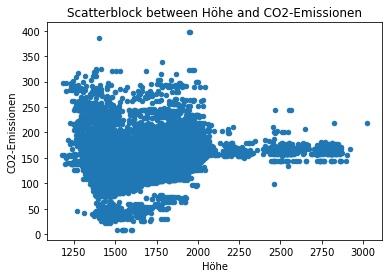

In [46]:
import matplotlib.pyplot as plt

features = ['CCM', 'HST PS', 'Anzahl der Türen', 'Leergewicht', 'Zuladung', 'Länge', 'Breite', 'Höhe']
    
for f in features: 
    title = 'Scatterblock between ' + f + ' and CO2-Emissionen'
    vehicle_data_updated.plot.scatter(x=f, y='CO2-Emissionen', title= title)
    plt.show(block=True)

##### Diskussion der Scatterblocks:
Die Features CCM (Hubraum in Kubikzentimetern), HST PS, Länge und Breite und Höhe und Leergewicht korrelieren deutlich erkennbar mit der Zielvariablen CO2-Emissionen. Dies erscheint plausibel, denn es ist davon auszugehen, dass diese Merkmale in der Tendenz jeweils proportional mit der Zielvariablen sind, d.h. je größer, schwerer und leistungsstärker ein Auto, desto größer sein CO2-Ausstoß. Gleichzeitig ist zu vermuten, dass es davon Ausnahmen gibt.

Der Scatterblock mit dem Merkmal Anzahl der Türen zeigt hingegen, dass es für jede gegebene Anzahl von Türen jeweils eine große Diversität an verschiedenen CO2-Ausstoß-Werten gibt. Dies ist einfach zu erklären: Der zweitürige, leistungsstarke Porsche Cabrio hat mehr CO2-Ausstoß als beispielsweise ein ebenso zweitüriger Smart. Und ein leistunsstarker 4-türiger SUV hat vermutlich mehr CO2-Ausstoß als ein ebenso 4-türiger VW Polo.

Das Merkmal Zuladung scheit kaum mit der Zielvariablen zu korrilieren. Eine schwerere Zuladung scheint bei einem Auto also keinen maßgeblich größeren CO2-Ausstoß nach sich zu ziehen. Dies könnte insofern plausibel sein, dass der CO2-Ausstoß eines Autos von der Leistungsstärke (HST PS und CCM) des Motors abhängen dürfte, und ein Motor bei moderater Zuladung (die sowieso durch das Ladevolumen eines Autos begrenzt ist) nicht plötzlich anders funktioniert als ohne Zuladung. Bei gleicher Geschwindigkeit und größerer Zuladung müsste der CO2-Ausstoß trotzdem ansteigen, deswegen wäre es überraschend, wenn gar kein Zusammenhang vorliegt.

### Data Encoding
1. Weisen Sie die Matrix der Eingabedaten dem 2-dimensionalen Array `X` und die Zielvariable dem 1-dimensionalen Array `y` zu.
2. Führen Sie auf `X` und `y` eine Partitionierung in Trainings- und Testdaten durch, wieder im Verhältnis 70/30.
3. Skalieren Sie die Eingabevariablen und die Zielvariable mit dem [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). Die Skalierung muss sowohl auf Trainings- als auch auf Testdaten ausgeführt werden. Warum darf die Skalierung erst nach dem Split in die beiden Partitionen ausgeführt werden? Worauf ist zu achten? 

Die Eingabedaten werden dem 2-dimensionalen numpy-Array X zugewiesen:

In [47]:
import numpy as np

X = vehicle_data_updated[['CCM', 'HST PS', 'Anzahl der Türen', 'Leergewicht', 'Zuladung', 'Länge',
                          'Breite', 'Höhe']].to_numpy()

Die Zielvariable wird dem 1-dimensionalen numpy-Array y zugewiesen:

In [48]:
y = vehicle_data_updated['CO2-Emissionen'].to_numpy()

Die Arrays X und y werden in Trainings- und Testdaten (Verhältnis 70/30) partioniert:

In [49]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [50]:
from sklearn.preprocessing import MinMaxScaler

inputScaler = MinMaxScaler()
outputScaler = MinMaxScaler()
inputScaler.fit(X_train)
X_train = inputScaler.transform(X_train)
X_test = inputScaler.transform(X_test)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
outputScaler.fit(y_train)
y_train = outputScaler.transform(y_train)
y_test = outputScaler.transform(y_test)
print(y_train)
y_train = y_train.flatten()
print(y_train)
y_test = y_test.flatten()



[[0.28442728]
 [0.2046332 ]
 [0.34877735]
 ...
 [0.26640927]
 [0.28700129]
 [0.34877735]]
[0.28442728 0.2046332  0.34877735 ... 0.26640927 0.28700129 0.34877735]


Es ist wichtig, den MinMaxScaler erst nach Erstellung der Partitionen anzuwenden und fit() auf die Trainingsdaten auszuführen. Das liegt daran, dass ansonsten Werte aus den Testdaten das Scaling und damit das Trainingsmodell beeinflussen könnten. Derartige Abweichungen sollten vermieden werden. Desweiteren muss man darauf achten, die Dimensionalität des Arrays mit Shape() und Flatten() and den Scaler und die weiteren Schritte anzupassen. 

### Training, Test und Evaluation verschiedener Regressionsmodelle

Führen Sie die folgenden Teilaufgaben sowohl für ein [Single Layer Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) als auch für ein [Multi Layer Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) mit 20 Neuronen in der Hidden-Schicht durch. Vergleichen Sie am Ende die Performance der beiden Verfahren.
1. Trainieren Sie den Algorithmus mit den Trainingsdaten.
2. Wenden Sie das gelernte Modell auf die Testdaten an.
3. Evaluieren Sie die Qualität der Modelle, indem Sie auf die vorhergesagten Ausgaben und die wahren Ausgaben die unten gegebene Funktion aufrufen.
4. Beschreiben Sie kurz die in der Funktion verwendeten Metriken

##### Single Layer Perceptron

Der Algorithmus wird mit den Trainingsdaten trainiert:

Zuerst wird die vorgegebene Funktion zum Anzeigen der Performance-Metriken definiert.

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error


def determineRegressionMetrics(y_test,y_pred,title=""):
    mse = mean_squared_error(y_test, y_pred)
    mad = mean_absolute_error(y_test, y_pred)
    rmsle=np.sqrt(mean_squared_error(np.log(y_test+1),np.log(y_pred+1)))# +1 for avoiding log(0)
    r2=r2_score(y_test, y_pred)
    med=median_absolute_error(y_test, y_pred)
    print(title)
    print("Mean absolute error =", round(mad, 2))
    print("Mean squared error =", round(mse, 2))
    print("Median absolute error =", round(med, 2))
    print("R2 score =", round(r2, 2))
    print("Root Mean Squared Logarithmic Error =",rmsle)

Jetzt wird eine Pipeline inklusive eines Skalierung und eines SLP erstellt. Die Skalierung ist wichtig, damit die Daten so "normalisiert" werden, dass sie optimal von SLP verarbeitet werden koennen.



``z = (x - u) / s``

Z ist dabei der skalierte Wert, x der zu skalierende Wert, u der Mittelwert und s die Standartabweichung.

In [52]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

slp = SGDRegressor(max_iter=1000)

Jetzt wird die Pipeline mit den Trainingsdaten trainiert.

In [53]:
slp.fit(X_train, y_train)

SGDRegressor()

Nun werden einige Performance-Metriken dieser Pipeline berechnet und ausgegeben. 

Da SLPs sind in der Regel bei einfachen Problemstellungen effektiv, also bei Eingabedaten, die eine lineare Loesungsfunktion haben. Da die Daten, wie in den vorhergehenden Plots zu sehen ist, durchaus lineare Abhaengigkeiten haben, wird davon ausgegagen, dass auch mit einem SLP eine durchaus gute Performance herauskommen kann.

In [54]:
from sklearn.neural_network import MLPRegressor

y_pred_slp = slp.predict(X_test)
determineRegressionMetrics(y_test, y_pred_slp)


Mean absolute error = 0.04
Mean squared error = 0.0
Median absolute error = 0.03
R2 score = 0.47
Root Mean Squared Logarithmic Error = 0.04634588163691603


Wie am Ergebnis zu sehen, ist die Performance nicht sonderlich gut. Dies ist wahrhscheinlich darauf zurueckzufuehren, dass ein SLP nicht ausreicht, um eine Kurve darzustellen, die in manchen Faellen das Problem effektiver loesen koennte als eine Gerade.

Ein MLP kann diesem Problem besser begegnen. Deshalb wird im naechsten Schritt ein **Multi Layer Perceptron** erstellt, welches die Aufgabe der CO2-Emissionsvorhersage mit hoehrerer Wahrscheinlichkeit loesen soll.
Als Parameter wird ein *random_state* mitgegeben, der die Reproduzierbarkeit garantiert, und die Konfiguration der *versteckten Schicht*, welche in diesem Fall eine Schicht mit 20 vollvernetzen Neuronen darstellt.

In [55]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error

hidden_layers = (20,)
mlp = MLPRegressor(random_state=0, hidden_layer_sizes=hidden_layers)

Nun wird das MLP mit den Trainingsdaten trainiert und ein Score mithilfe der Testdaten ausgegeben.
Zusaetzlich dazu werden einige Fehlerraten mit der vorgegebenen Funktion *determineRegressionMetrics* ausgegeben.

In [56]:
mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

determineRegressionMetrics(y_test, y_pred_mlp)


Mean absolute error = 0.04
Mean squared error = 0.0
Median absolute error = 0.03
R2 score = 0.49
Root Mean Squared Logarithmic Error = 0.045588679353132516


Wie erwartet sind die Ergebnisse des MLP besser, jedoch ist der Unterschied marginal.

Daraus laesst sich schliessen, dass hauptsaechlich fast lineare Abhaengigkeiten zwischen den Daten vorhanden sind. Ob der Einsatz eines MLP mehr Sinn ergibt haengt nun von der Anwendung ab, und in welchem Kontext die Berechnungen durchgefuehrt werden. 

### Hyperparameteroptimierung

Für ein [Multi Layer Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) soll eine Hyperparameteroptimierung durchgeführt werden. Ziel ist es innerhalb der unten vorgegebenen Wertebereiche für die Hyperparameter `hidden_layer_sizes`, `activation` und `learning_rate` die beste Konfiguration zu finden. Hierzu kann entweder [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) oder [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) eingesetzt werden. GridSearchCV testet einfach alle Konfigurationen durch, benötigt daher aber viel Zeit. RandomizedSearchCV geht heuristisch und damit schneller durch den Suchraum. Wenden Sie eines dieser beiden Verfahren an, um für das unten gegebene Parameter-Grid die optimale Konfiguration zu finden. Welches ist die optimale Konfiguration und zu welchem `neg_mean_absolute_error`  führt diese?

Es wird für jeden Hyperparameter eine endliche Menge an Werten festgelegt, da die Suche nach der besten Konfiguration sonst zu lange bzw. bei reelen, also unbegrenztengan Hyperparameterräumen unendlich lange dauern würde.

In [58]:
param_grid = [{'hidden_layer_sizes': [(10,),(20,),(30,),(40,),(50,),(100,),(10,10)], 
               'activation': ["logistic", "tanh", "relu"], 
               'learning_rate': ["constant", "invscaling", "adaptive"]
              }]
param_grid

[{'hidden_layer_sizes': [(10,), (20,), (30,), (40,), (50,), (100,), (10, 10)],
  'activation': ['logistic', 'tanh', 'relu'],
  'learning_rate': ['constant', 'invscaling', 'adaptive']}]

Jetzt wird mit Hilfe der zwei Hyperparameter-Suchmethoden herausgefunden, welche Hyperparameter die besten für die gegebene Domaene ist. Um das Suchen zu generalisieren, wird eine Methode erstellt, die gegeben einer Suchmethode nach dem MLP mit dem besten Score sucht.

In [59]:
import warnings
from sklearn.model_selection import GridSearchCV

def find_best_mlp(parameters, hyperparameter_search_method=GridSearchCV, parallel_jobs=None):
    mlp = MLPRegressor(random_state=0)
    
    # surpress warnings to keep the output cell readable 
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        clf = hyperparameter_search_method(mlp, parameters, n_jobs=parallel_jobs)
        clf.fit(X_train, y_train)
    return clf

Nun wird diese Methode mit der ersten Suchmethode, dem _GridSearchCV_, ausgefuehrt. Dies kann, je nach Leistungsfaehigkeit des eigenen Rechners durchaus etwas laenger dauern, da die GridSearchCV-Methode alle gegebenen Parameterkonfigurationen ausprobiert, um die Beste zu finden.

Da alle Konfigurationen ueberprueft werden, kann davon ausgegangen werden, dass auch wirklich die beste Konfiguration gefunden wird.

In [257]:

optimized_mlp_grid = find_best_mlp(param_grid, hyperparameter_search_method=GridSearchCV)

In [258]:
print("Best parameters as found by grid search: {}".format(optimized_mlp_grid.best_params_))
grid_score = optimized_mlp_grid.score(X_test, y_test)
print("MLP optimized by grid search has score of: {}".format(grid_score))

Best parameters as found by grid search: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
MLP optimized by grid search has score of: 0.5869488921185667


##### Fazit Grid Search

Die Suchfunktion Grid-Search gibt 50 als besten Wert für die Hidden-Layer zurück. Bei dieser großen Zahl ist es gut verständlich, dass gleichzeitg Relu als beste Aktivierungsfunktion ausgemacht wurde, da sie die beliebteste, weil geeignetste Funktion für Deep Learning ist. Dies liegt neben ihrer größeren Schnelligkeit und geringerer Operationskosten im Vergleich zu der Sigmoid- und der Tanh-Funktion an dem ''Verschwindenden-Gradienten''-Problem der letztgenannten Funktionen. Für sehr große und sehr kleine Eingabewerte saturiert die Sigmoid-Funktion bei 1 bzw. 0, die Tanh-Funktion bei 1 bzw. -1, was an diesen Stellen extrem kleine Ableitungen zur Folge hat. Somit können aus tieferen Schichten nur sehr kleine Gradienten als Informationen durch das neuronale Netz gesendet werden. Dies führt zu weniger effektivem Lernen im Vergleich zur Relu-Funktion, die dieses Problem nicht mit sich bringt. 

Nun wird sich der zweiten Suchmethode, der _RandomizedSearchCV_, zugewandt. Anders als der Grid-Search, werden hier nicht alle Konfigurationen ausprobiert, sondern nur zufaellig ausgewaehlte Parameterkonfigurationen.

Dementsprechend kann man hier nicht davon ausgehen, dass das optimale Ergebnis gefunden wird. Der Vorteil ist dabei, dass nicht alle Konfigurationen ausprobiert werden, was, vor allem bei leistungsschwacherer Hardware einen enormen Zeitvorteil bringt. Dies kann auch genauer mithilfe des *n_iter*-Paramteres genauer spezifiziert werden, was allerdings fuer diesen Versuch nicht notwendig ist, da es nicht zu viele Parameterkonfigurationen gibt.

In [259]:
from sklearn.model_selection import RandomizedSearchCV
optimized_mlp_random = find_best_mlp(param_grid, hyperparameter_search_method=RandomizedSearchCV)

In [260]:
print("Best parameters as found by randomized search: {}".format(optimized_mlp_random.best_params_))

randomized_score = optimized_mlp_random.score(X_test, y_test)
print("MLP optimized by randomized search has score of: {}".format(randomized_score))

Best parameters as found by randomized search: {'learning_rate': 'constant', 'hidden_layer_sizes': (50,), 'activation': 'relu'}
MLP optimized by randomized search has score of: 0.5552008480881628


Wie erwartet, kommt hierbei ein anderes, weniger optimales Ergebnis heraus. Der Prozess hat ebenfalls wie erwartet durchaus kuerzer gedauert, da nicht alle Konfigurationen ausprobiert werden.

Da der Grid-Search immer das optimale Ergebnis liefert, wird sich in diesem Falle auch auf das Ergebenis dieser Methode verlassen, und das Ergebnis des *Randomized-Searches* lediglich fuer Demonstrationszwecke verwendet.